# MNIST classification problem - Support Vector Machine classifier

In this, colab we will implement multiclass MNIST digit recognition classifier with SVMs.

In [1]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

In [3]:
from keras.datasets import mnist
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, plot_roc_curve, roc_auc_score, plot_confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedShuffleSplit

# Loading MNIST dataset

In [4]:
# Load dataset

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
print('Shape of training data',X_train.shape)
print('Shape of training labels',y_train.shape)
print('Shape of test data',X_test.shape)
print('Shape of test labels',y_test.shape)

Shape of training data (60000, 28, 28)
Shape of training labels (60000,)
Shape of test data (10000, 28, 28)
Shape of test labels (10000,)


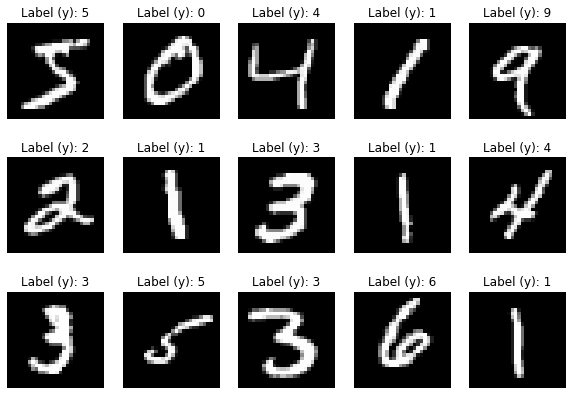

In [7]:
fig = plt.figure(figsize=(10,7))
for i in range(15):
  ax = fig.add_subplot(3,5,i+1)
  ax.imshow(X_train[i],cmap='gray')
  ax.set_title('Label (y): {y}'.format(y=y_train[i]))
  plt.axis('off')

In [8]:
# Flatten each input image into a vector of length 784

X_train = X_train.reshape(X_train.shape[0],28*28)
X_test = X_test.reshape(X_test.shape[0],28*28)

# Normalizing
X_train = X_train/255
X_test = X_test/255

In [9]:
print('Shape of training data after flattening', X_train.shape)
print('Shape of testing data after flattening', X_test.shape)

Shape of training data after flattening (60000, 784)
Shape of testing data after flattening (10000, 784)


Let us consider the first 10,000 images in training dataset and first 2,000 images in testing dataset.

In [10]:
X_train = X_train[0:10000,:]
y_train = y_train[0:10000]
X_test = X_test[0:2000,:]
y_test = y_test[0:2000]

# Linear SVM for MNIST multiclass classification

## Using Pipeline

In [11]:
pipe_l = Pipeline([('scaler', MinMaxScaler()),
                   ('classifier', SVC(kernel='linear', C=1))])
pipe_l.fit(X_train, y_train.ravel())

#Evaluate the model using crossvalidation
acc = cross_val_score(pipe_l, X_train, y_train.ravel(), cv=2)
print('Training Accuracy: {:.2f} %'.format(acc.mean()*100))

Training Accuracy: 91.07 %


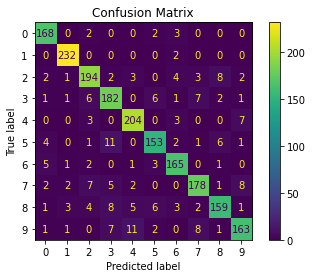

In [12]:
# visualiing the confusion matrix
y_pred = pipe_l.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [13]:
CR = classification_report(y_test, y_pred)
print('Classification report \n')
print(CR)

Classification report 

              precision    recall  f1-score   support

           0       0.91      0.96      0.94       175
           1       0.96      0.99      0.98       234
           2       0.89      0.89      0.89       219
           3       0.85      0.88      0.86       207
           4       0.90      0.94      0.92       217
           5       0.89      0.85      0.87       179
           6       0.90      0.93      0.91       178
           7       0.89      0.87      0.88       205
           8       0.89      0.83      0.86       192
           9       0.89      0.84      0.86       194

    accuracy                           0.90      2000
   macro avg       0.90      0.90      0.90      2000
weighted avg       0.90      0.90      0.90      2000



# Nonlinear SVM for MNIST multiclass classification

## Using Pipeline

In [14]:
pipe_2 = Pipeline([('scaler', MinMaxScaler()),
                   ('classifier', SVC(kernel='rbf', gamma=0.1, C=1))])
pipe_2.fit(X_train, y_train.ravel())

#Evaluate the model using crossvalidation
acc = cross_val_score(pipe_2, X_train, y_train.ravel(), cv=2)
print('Training Accuracy: {:.2f} %'.format(acc.mean()*100))

Training Accuracy: 82.87 %


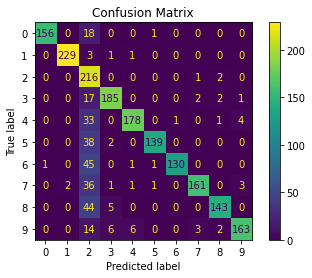

In [15]:
# visualizing the confusion matrix
y_pred = pipe_2.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [16]:
CR = classification_report(y_test, y_pred)
print('Classification report \n')
print(CR)

Classification report 

              precision    recall  f1-score   support

           0       0.99      0.89      0.94       175
           1       0.99      0.98      0.98       234
           2       0.47      0.99      0.63       219
           3       0.93      0.89      0.91       207
           4       0.95      0.82      0.88       217
           5       0.98      0.78      0.87       179
           6       0.99      0.73      0.84       178
           7       0.96      0.79      0.87       205
           8       0.95      0.74      0.84       192
           9       0.95      0.84      0.89       194

    accuracy                           0.85      2000
   macro avg       0.92      0.84      0.86      2000
weighted avg       0.91      0.85      0.86      2000



# Using GridSearchCV

We can use a grid search cross-validation to explore combinations of parameters. Here we will adjust c (which control margin hardness) and gamma (which controls the sie of the radial basis function kernel), and determine the best model:

In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

C_range = np.logspace(-2,10,13)
gamma_range=np.logspace(-9,3,13)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits = 3, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(kernel='rbf'), param_grid=param_grid, cv=cv)
grid.fit(X_train, y_train.ravel())

In [ ]:
print('The best parameters are %s with a score of %0.2f' % (grid.best_params_, grid.best_score_))